<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/fipy2D_unstructuredGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.ctcms.nist.gov/fipy/examples/diffusion/generated/examples.diffusion.mesh20x20.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
meshInputFileName = '/content/drive/MyDrive/Colab Notebooks/rectangle.geo'

In [ ]:
from fipy import *
from fipy.tools import numerix

In [ ]:
mesh = Gmsh2D(meshInputFileName)
print('mesh.globalNumberOfCells = ', mesh.globalNumberOfCells)

mesh.globalNumberOfCells =  20


mesh.globalNumberOfCells =  20


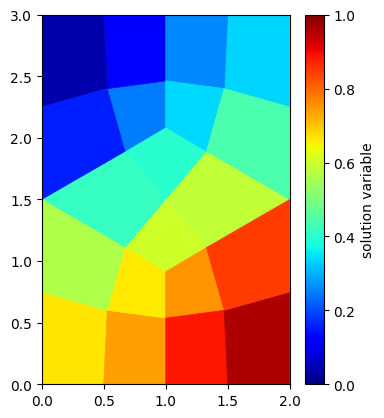

In [ ]:
Lx = 2
Ly = 3
dx = min(numerix.sqrt(mesh.cellVolumes))

phi = CellVariable(name = "solution variable",
                   mesh = mesh,
                   value = 0.)

D = 1.
eq = TransientTerm() == DiffusionTerm(coeff=D)

valueTopLeft = 0
valueBottomRight = 1

X, Y = mesh.faceCenters
facesTopLeft = ((mesh.facesLeft & (Y > Ly / 2)) | (mesh.facesTop & (X < Lx / 2)))
facesBottomRight = ((mesh.facesRight & (Y < Ly / 2)) | (mesh.facesBottom & (X > Lx / 2)))

phi.constrain(valueTopLeft, facesTopLeft)
phi.constrain(valueBottomRight, facesBottomRight)

viewer = Viewer(vars=phi, datamin=0, datamax=1.)
viewer.plotMesh()

timeStepDuration = 10 * 0.9 * dx**2 / (2 * D)
steps = 50
for step in range(steps):
  eq.solve(var=phi,
            dt=timeStepDuration)
  viewer.plot()
print('mesh.globalNumberOfCells = ', mesh.globalNumberOfCells)


In [ ]:
simOutputFile = '/content/drive/MyDrive/Colab Notebooks/tosaveresults2.txt'
TSVViewer(vars=(phi, phi.grad)).plot(filename=simOutputFile)